 **BWF_DEEPLEARNING_PROJECT#1** 

 Submitted By: **Muhammad Zaki Ahmad** 

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms? Inspect the Data! 

- The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.
- Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?
- It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?
- Using glob, loop through the census files available and load them into DataFrames or maybe load them separately in different DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.
- Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?
- Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.
- Start to make a plan for how to convert these columns into the right types for manipulation.
- Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results. Convert both of the columns into numerical datatypes.
- There is still an M or an F character in each entry! We should remove those before we convert.
- Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!
- Use matplotlib to make a scatterplot!
- plt.scatter(the_women_column, the_income_column) Remember to call plt.show() to see the graph!
- Did you get an error? These monstrous csv files probably have nan or null values in them! Print out your column with the number of women per state to see.
- We can fill in those nans by using pandas’ .fillna() function.
- You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.
- Print out the Women column after filling the nan values to see if it worked!
- We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.
- Drop those duplicates using the .drop_duplicates() function.
- Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.
- Histograms of Races. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.
- Try to make a histogram for each one!
- You will have to get the columns into numerical format, and those percentage signs will have to go.
- Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.
- Phew. You’ve definitely impressed your boss on your first day of work.

In [87]:
# importing important libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Combining All the dataframes**

In [61]:
# set the path to the directory containing the CSV files
path = '/content/drive/MyDrive/BWF_DeepLearning/Project#1'

In [62]:
# get a list of all CSV files in the directory
files = [f for f in os.listdir(path) if f.endswith('.csv')]
files

['states8.csv',
 'states3.csv',
 'states4.csv',
 'states7.csv',
 'states5.csv',
 'states9.csv',
 'states1.csv',
 'states6.csv',
 'states2.csv',
 'states0.csv']

In [63]:
# create a list of DataFrames
df_list = [pd.read_csv(os.path.join(path, f), usecols=lambda col: col != 0) for f in files]

In [64]:
# concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

In [65]:
df = combined_df

**Understanding Data**

In [66]:
df = df.drop('Unnamed: 0', axis=1)

In [69]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M_419713F
3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F
4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M_13367298F


In [70]:
df.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [68]:
df.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

**Cleaning the Data**

In [71]:
df['Hispanic'] = df['Hispanic'].str.replace('%', '').astype(float) / 100
df['White'] = df['White'].str.replace('%', '').astype(float) / 100
df['Black'] = df['Black'].str.replace('%', '').astype(float) / 100
df['Native'] = df['Native'].str.replace('%', '').astype(float) / 100
df['Asian'] = df['Asian'].str.replace('%', '').astype(float) / 100
df['Pacific'] = df['Pacific'].str.replace('%', '').astype(float) / 100


In [72]:
df['Income'] = df['Income'].str.replace('$', '').astype(float)


<ipython-input-72-04aa9dc83f42>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '').astype(float)


In [73]:
df['GenderPop']

0         510388M_543273F
1       2322409M_2455167F
2         423477M_419713F
3       3167756M_3331859F
4     13171316M_13367298F
5       1459229M_1444150F
6       1534595M_1558931F
7       1439862M_1453125F
8       2164208M_2233145F
9       2261156M_2364097F
10        650081M_679019F
11             2872643M_F
12             2872643M_F
13      3249650M_3455936F
14      4861973M_5038598F
15      2692166M_2727005F
16      1451723M_1536358F
17      2964003M_3081445F
18      5662893M_5913084F
19      1906944M_1942789F
20      1948453M_1990780F
21      6245344M_6534215F
22      1713860M_1869213F
23        510388M_543273F
24      2964003M_3081445F
25              510163M_F
26        929606M_939759F
27      1407735M_1390901F
28        653484M_670717F
29      4343027M_4561386F
30      1459229M_1444150F
31        308573M_318031F
32      4060948M_4195682F
33      3487725M_3497739F
34        913631M_937789F
35      2851385M_2890732F
36      2648667M_2630239F
37      1751607M_1841615F
38        44

In [74]:
df[['MalePop', 'FemalePop']] = df['GenderPop'].str.split('_', expand=True)
df['MalePop'] = df['MalePop'].str.replace('M', '').astype(int)



In [76]:
df['FemalePop'] = df['FemalePop'].str.replace('F', '')

In [77]:
df.loc[[11, 12, 25], "FemalePop"] = 0

In [78]:
df['FemalePop']

0       543273
1      2455167
2       419713
3      3331859
4     13367298
5      1444150
6      1558931
7      1453125
8      2233145
9      2364097
10      679019
11           0
12           0
13     3455936
14     5038598
15     2727005
16     1536358
17     3081445
18     5913084
19     1942789
20     1990780
21     6534215
22     1869213
23      543273
24     3081445
25           0
26      939759
27     1390901
28      670717
29     4561386
30     1444150
31      318031
32     4195682
33     3497739
34      937789
35     2890732
36     2630239
37     1841615
38      478041
39      340810
40    10045763
41     5123362
42     4561386
43     1051703
44    10131373
45     5049925
46      353677
47     5913084
48     5123362
49      696428
50      806083
51     6556862
52     3333382
53     1558931
54     2489527
55      349215
56     3342840
57     1506295
58    19334329
59     2630239
Name: FemalePop, dtype: object

In [79]:
df["FemalePop"] = df["FemalePop"].astype(int)


In [80]:
df["FemalePop"].dtype

dtype('int64')

In [55]:
df.describe()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,55.000000,60.000000,6.000000e+01,6.000000e+01
mean,6.238516e+06,0.123557,0.676416,0.121696,0.013714,0.035918,0.002829,56632.043447,3.067189e+06,3.060988e+06
std,6.588488e+06,0.146512,0.175671,0.117266,0.028917,0.049398,0.011856,11470.954059,3.250785e+06,3.394400e+06
min,6.266040e+05,0.012909,0.007736,0.000926,0.000028,0.000752,0.000012,20720.538286,3.066740e+05,0.000000e+00
25%,2.030429e+06,0.046988,0.564888,0.032570,0.001925,0.015355,0.000280,49536.929939,1.006712e+06,9.048625e+05
50%,4.701414e+06,0.084686,0.715881,0.082338,0.003463,0.023243,0.000428,54239.861387,2.291782e+06,2.111962e+06
75%,7.303256e+06,0.134684,0.794068,0.172396,0.009653,0.037578,0.000869,64341.503756,3.631031e+06,3.672225e+06
max,3.842146e+07,0.988936,0.939831,0.517765,0.163910,0.365921,0.087589,78765.400725,1.908714e+07,1.933433e+07


In [81]:
df.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      5
Income       0
GenderPop    0
MalePop      0
FemalePop    0
dtype: int64

In [58]:
# calculate the mean of the non-null values in the "Pacific" column
mean_pacific = df["Pacific"].mean()

# replace the null values in the "Pacific" column with the calculated mean
df["Pacific"].fillna(mean_pacific, inplace=True)

In [59]:
df.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      0
Income       0
GenderPop    0
MalePop      0
FemalePop    0
dtype: int64

In [83]:
def femalePop(row):
    if row['FemalePop'] == 0:
        return row['TotalPop'] - row['MalePop']
    else:
        return row['FemalePop']

# Apply the function to the Female_Pop column
df['Female_Pop'] = df.apply(femalePop, axis=1)
     

In [85]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47     True
48     True
49    False
50    False
51    False
52    False
53     True
54    False
55    False
56    False
57    False
58    False
59     True
dtype: bool

In [86]:
df.drop_duplicates(inplace=True)


**Making Required Visualizations**

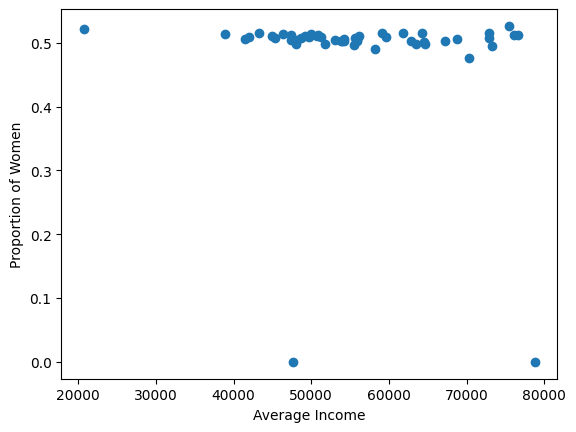

In [88]:
plt.scatter(df["Income"], df["FemalePop"] / df["TotalPop"])
plt.xlabel("Average Income")
plt.ylabel("Proportion of Women")
plt.show()

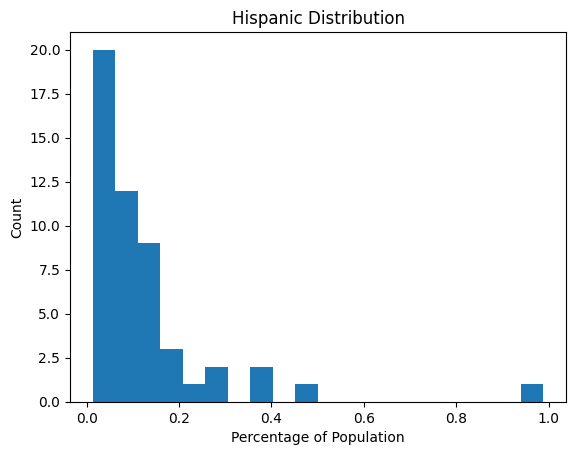

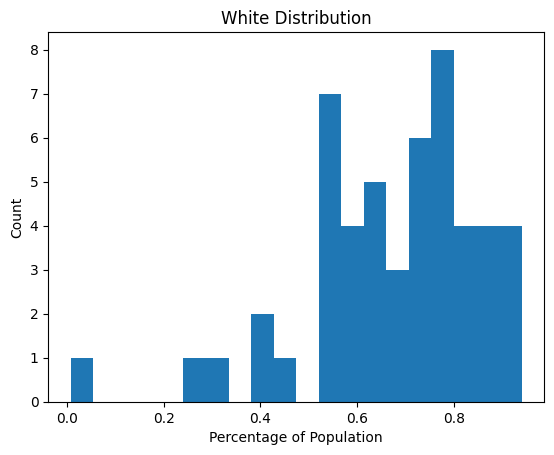

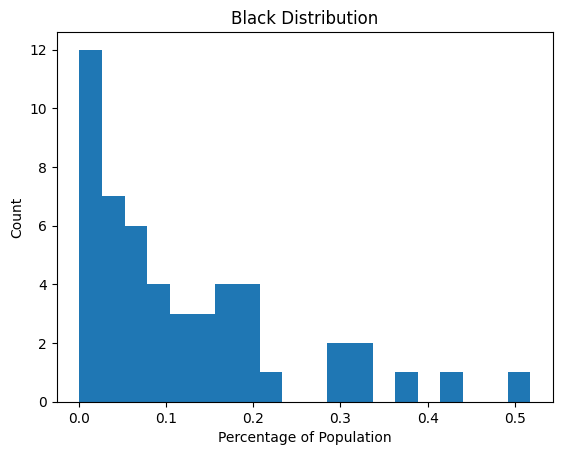

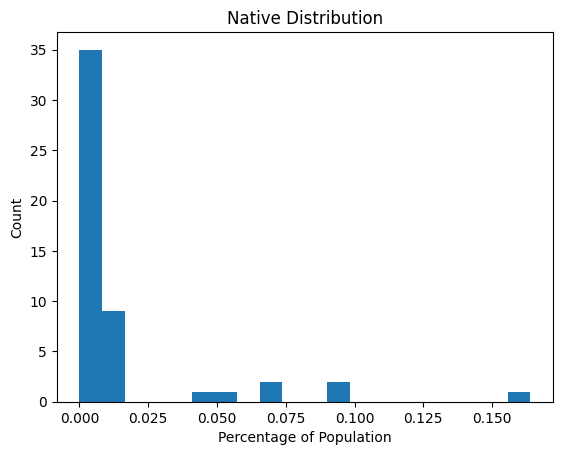

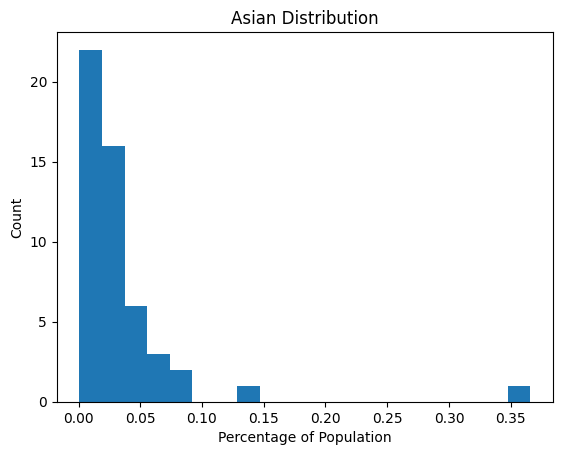

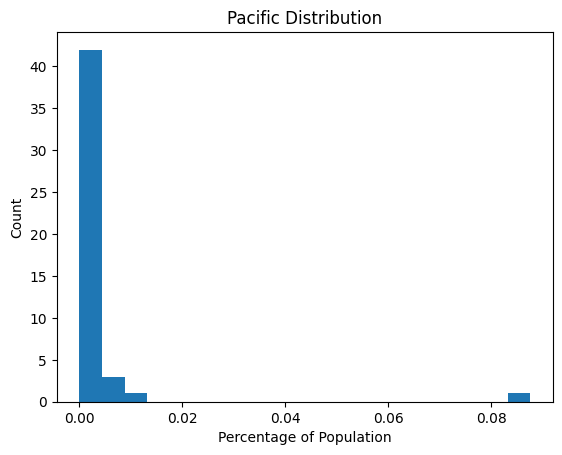

In [89]:
# Create a list of the column names for the races
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

# Loop over the race columns and create a histogram for each one
for race in races:
    # Filter out any rows with null values in the race column
    filtered_df = df[df[race].notnull()]
    # Create the histogram
    plt.hist(filtered_df[race], bins=20)
    plt.title(f'{race} Distribution')
    plt.xlabel('Percentage of Population')
    plt.ylabel('Count')
    plt.show()

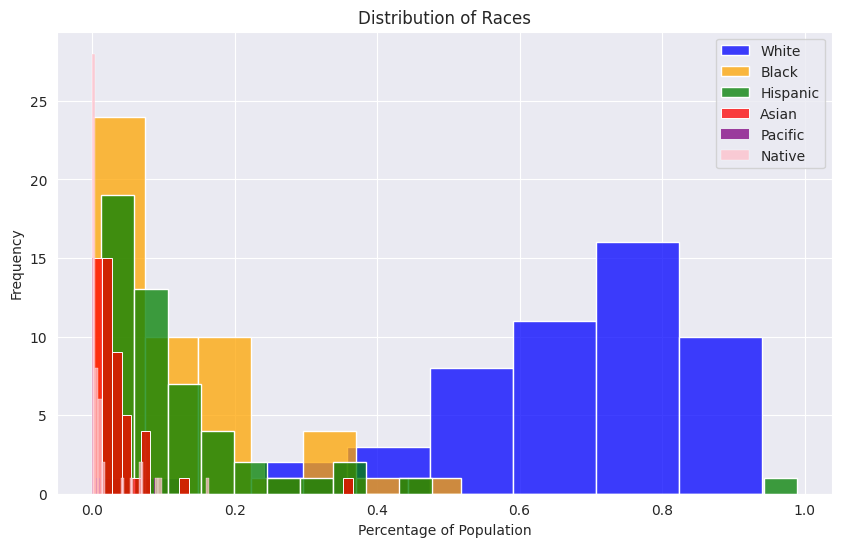

In [92]:

sns.set_style('darkgrid')

# set the figure size
plt.figure(figsize=(10,6))

# plot the histogram
sns.histplot(df['White'], color='blue', label='White', kde=False)
sns.histplot(df['Black'], color='orange', label='Black', kde=False)
sns.histplot(df['Hispanic'], color='green', label='Hispanic', kde=False)
sns.histplot(df['Asian'], color='red', label='Asian', kde=False)
sns.histplot(df['Pacific'], color='purple', label='Pacific', kde=False)
sns.histplot(df['Native'], color='pink', label='Native', kde=False)

# set the x and y labels
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency')

# set the title
plt.title('Distribution of Races')

# add a legend
plt.legend()

# show the plot
plt.show()
